In [52]:
import pandas as pd

from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt


In [36]:
#pip install --upgrade matplotlib

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\User\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)


In [19]:
# Load and preprocess the data
data = pd.read_csv("C:/Users/User/Documents/GitHub/MSC_DA_CA2v4/FoodTweets.csv", error_bad_lines=False)  # Assuming you have a CSV file with tweet data

data.head(5)

,Unnamed: 0,Sentiment,tweet,date,Polarity
0,0,0,glad to know my family bought tons of gluten f...,Sat May 02 06:26:48 PDT 2009,Negative
1,1,0,@pornlaw damn u on the grill when i'm in vegas...,Sun May 17 10:49:49 PDT 2009,Negative
2,2,0,tofu too healthy... searching through the cupb...,Mon May 18 03:17:33 PDT 2009,Negative
3,3,0,looking for food at home!.... nothing,Fri May 29 12:28:39 PDT 2009,Negative
4,4,0,watching something on food network with corey....,Sat May 30 16:50:48 PDT 2009,Negative


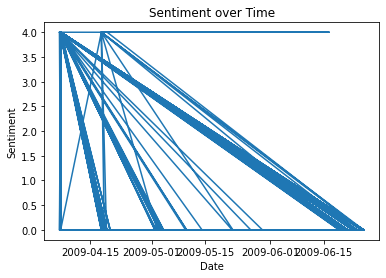

In [55]:
# Plot the change in sentiment
dates = pd.to_datetime(data["date"])  # Convert the date column to datetime
sentiment = data["Sentiment"]
plt.plot(dates,sentiment)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.title("Sentiment over Time")
plt.show()


In [12]:
# Preprocess the dataset
data = data.sample(frac=1)  # Shuffle the data
data = data.sample(n=7000).reset_index(drop=True) # Select a subset for faster processing

In [20]:
# Tokenize tweets
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
data["tokens"] = data["tweet"].apply(tokenizer.tokenize)

In [21]:
# Convert tokens to strings
data["tokens"] = data["tokens"].apply(lambda x: ' '.join(x))


In [25]:
# Split the dataset into training and testing sets
train_size = int(0.8 * len(data))
train_data =data[:train_size]
test_data = data[train_size:]


In [26]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data["tokens"])
test_vectors = vectorizer.transform(test_data["tokens"])


In [27]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(train_vectors, train_data["Sentiment"])


LogisticRegression()

In [28]:
# Make predictions on the testing set
predictions = model.predict(test_vectors)


In [29]:
# Calculate accuracy
accuracy = accuracy_score(test_data["Sentiment"], predictions)
print("Accuracy:", accuracy)



Accuracy: 0.5599051008303677


In [30]:
# Calculate confusion matrix
cm = confusion_matrix(test_data["Sentiment"], predictions)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[  0   0]
 [742 944]]


In [31]:
# Calculate change in sentiment over time
data["predicted_polarity"] = model.predict(vectorizer.transform(data["tokens"]))
data["change_in_sentiment"] = data["Sentiment"] - data["predicted_polarity"]



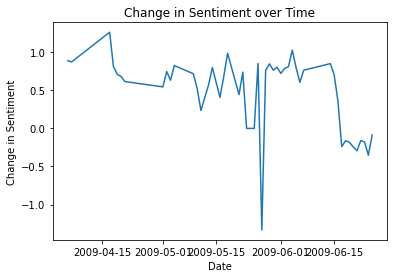

In [53]:
# Plot the change in sentiment
data["date"] = pd.to_datetime(data["date"])  # Convert the date column to datetime
daily_sentiment = data.groupby(data["date"].dt.date)["change_in_sentiment"].mean()
daily_sentiment.plot(kind="line")
plt.xlabel("Date")
plt.ylabel("Change in Sentiment")
plt.title("Change in Sentiment over Time")
plt.show()
